In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Барометрический эффект - зависимость интенсивности регистрируемого потока космических лучей (КЛ) от давления в точке наблюдения.
С повышением давления ннтенсивность КЛ понижается, что объясняется поглощением КЛ в атмосфере, масса которой над местом наблюдения меняется в соответствии с изменением давления.
Вариации КЛ, имеющие внеатмосферное происхождения оказываются такого же порядка, что и атмосферные.
Поэтому для выделения вариаций внеатмосферного происхождения необходимо определять изменения интенсивности метеорологического характера и исключать их из данных наблюдений. 

Файл с данными сцинтилляционного мюонного годоскопа (СцМГ) за июнь 2022 года.

Используемые данные в файле:
I - интесивность мюонов КЛ, с^-1;
P - давление, мбар

In [2]:
counting_rate_ScMH = pd.read_csv('June_2022.csv', sep = ';')
counting_rate_ScMH.head()

,Date,Nkadr,Pbar,Themp,NAll,sigNAll,NRec,sigNRec
0,01-06-22 00:00:00,5342,1001.027,23.699,1361.0,4.8785,1197.2,4.5756
1,01-06-22 00:01:00,5343,1001.033,23.688,1363.5,4.8830,1199.1,4.5793
2,01-06-22 00:02:00,5344,1001.055,23.690,1376.9,4.9071,1210.4,4.6009
3,01-06-22 00:03:00,5345,1001.091,23.690,1363.6,4.8835,1199.2,4.5796
4,01-06-22 00:04:00,5346,1001.068,23.692,1358.1,4.8731,1195.5,4.5721


In [3]:
#Устанавливаем правильный формат времени

counting_rate_ScMH['Date'] = pd.to_datetime(counting_rate_ScMH['Date'], format="%d-%m-%y %H:%M:%S")

In [4]:
counting_rate_ScMH.dtypes

Date       datetime64[ns]
Nkadr               int64
Pbar              float64
Themp             float64
NAll              float64
sigNAll           float64
NRec              float64
sigNRec           float64
dtype: object

In [5]:
counting_rate_ScMH.shape

(43195, 8)

In [6]:
counting_rate_ScMH.rename(columns = {'Pbar':'P', 'NRec' : 'I'}, inplace = True )
counting_rate_ScMH.head()

,Date,Nkadr,P,Themp,NAll,sigNAll,I,sigNRec
0,2022-06-01 00:00:00,5342,1001.027,23.699,1361.0,4.8785,1197.2,4.5756
1,2022-06-01 00:01:00,5343,1001.033,23.688,1363.5,4.8830,1199.1,4.5793
2,2022-06-01 00:02:00,5344,1001.055,23.690,1376.9,4.9071,1210.4,4.6009
3,2022-06-01 00:03:00,5345,1001.091,23.690,1363.6,4.8835,1199.2,4.5796
4,2022-06-01 00:04:00,5346,1001.068,23.692,1358.1,4.8731,1195.5,4.5721


**Расчет средней скорости счета mean_I (c^-1)**

In [7]:
mean_I = counting_rate_ScMH['I'].mean()
mean_I

1197.6804815372147

**Расчет среднего давления mean_P (мбар)**

In [8]:
mean_P = counting_rate_ScMH['P'].mean()
mean_P

994.2838044449588

**Вычисление коэффициента корреляции между I и P**

In [9]:
B = counting_rate_ScMH['I'].corr(counting_rate_ScMH['P'])
B

-0.69773273063949

**Диаграмма рассеяния скорости счета от давления с линией регрессии**

[Text(0.5, 0, 'Давление, мбар'), Text(0, 0.5, 'Скорость счета, с^-1')]

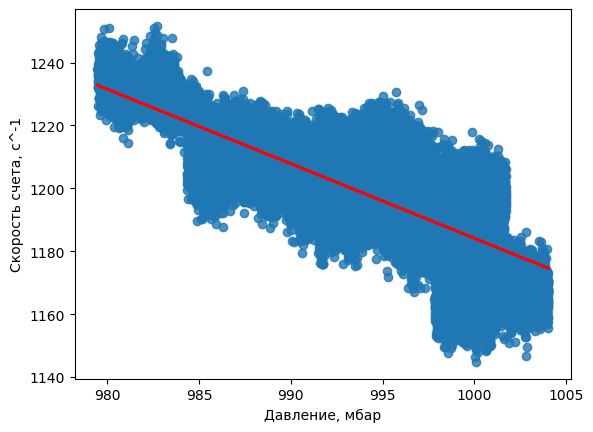

In [10]:
reg = sns.regplot(x = 'P', y = 'I', data = counting_rate_ScMH, line_kws={"color": "red"})
reg.set(xlabel = 'Давление, мбар', ylabel = 'Скорость счета, с^-1')

**Зависимость скорости счета СцМГ (I, c^-1) от времени**

(array([19144., 19148., 19152., 19156., 19160., 19164., 19168., 19172.,
        19174.]),
 [Text(19144.0, 0, '2022-06-01'),
  Text(19148.0, 0, '2022-06-05'),
  Text(19152.0, 0, '2022-06-09'),
  Text(19156.0, 0, '2022-06-13'),
  Text(19160.0, 0, '2022-06-17'),
  Text(19164.0, 0, '2022-06-21'),
  Text(19168.0, 0, '2022-06-25'),
  Text(19172.0, 0, '2022-06-29'),
  Text(19174.0, 0, '2022-07-01')])

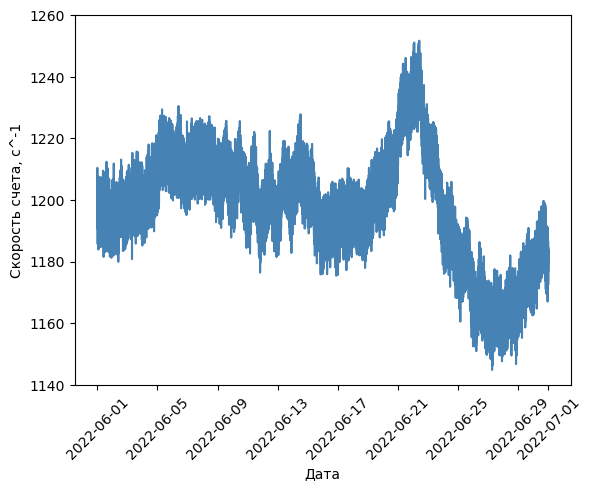

In [11]:
ax = sns.lineplot(x='Date', y='I', data=counting_rate_ScMH, color='steelblue')
ax.set (xlabel='Дата', ylabel='Скорость счета, с^-1')
ax.set(ylim=(1140, 1260))
plt.xticks(rotation=45)

**Формула учета поправки на давление (P, мбар) в скорости счета СцМГ (I, c^-1):**

In [12]:
counting_rate_ScMH['Icorrp'] = mean_I + B* (counting_rate_ScMH['P'] - mean_P)
counting_rate_ScMH.head()

,Date,Nkadr,P,Themp,NAll,sigNAll,I,sigNRec,Icorrp
0,2022-06-01 00:00:00,5342,1001.027,23.699,1361.0,4.8785,1197.2,4.5756,1192.975533
1,2022-06-01 00:01:00,5343,1001.033,23.688,1363.5,4.8830,1199.1,4.5793,1192.971347
2,2022-06-01 00:02:00,5344,1001.055,23.690,1376.9,4.9071,1210.4,4.6009,1192.955997
3,2022-06-01 00:03:00,5345,1001.091,23.690,1363.6,4.8835,1199.2,4.5796,1192.930878
4,2022-06-01 00:04:00,5346,1001.068,23.692,1358.1,4.8731,1195.5,4.5721,1192.946926


**Зависимость скорости счета СцМГ (I, c^-1) с поправкой на давление от времени**

(array([19144., 19148., 19152., 19156., 19160., 19164., 19168., 19172.,
        19174.]),
 [Text(19144.0, 0, '2022-06-01'),
  Text(19148.0, 0, '2022-06-05'),
  Text(19152.0, 0, '2022-06-09'),
  Text(19156.0, 0, '2022-06-13'),
  Text(19160.0, 0, '2022-06-17'),
  Text(19164.0, 0, '2022-06-21'),
  Text(19168.0, 0, '2022-06-25'),
  Text(19172.0, 0, '2022-06-29'),
  Text(19174.0, 0, '2022-07-01')])

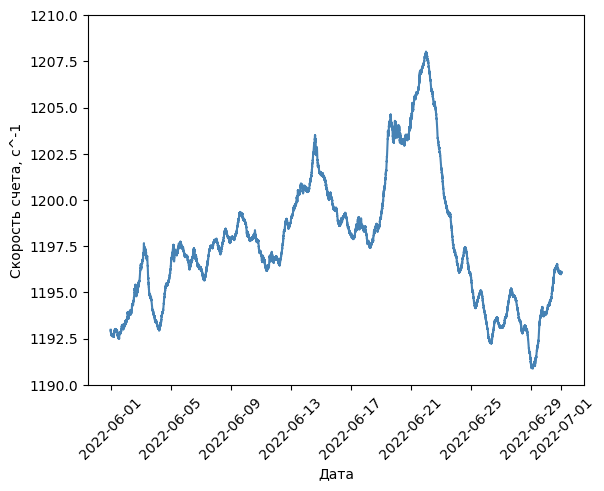

In [13]:
ax = sns.lineplot(x='Date', y='Icorrp', data=counting_rate_ScMH, color='steelblue')
ax.set (xlabel='Дата', ylabel='Скорость счета, с^-1')
ax.set(ylim=(1190, 1210))
plt.xticks(rotation=45)

**Общая зависимость скорости счета СцМГ (I, c^-1) без поправки (синия линия) и с поправкой (красная линия) на давление от времени**

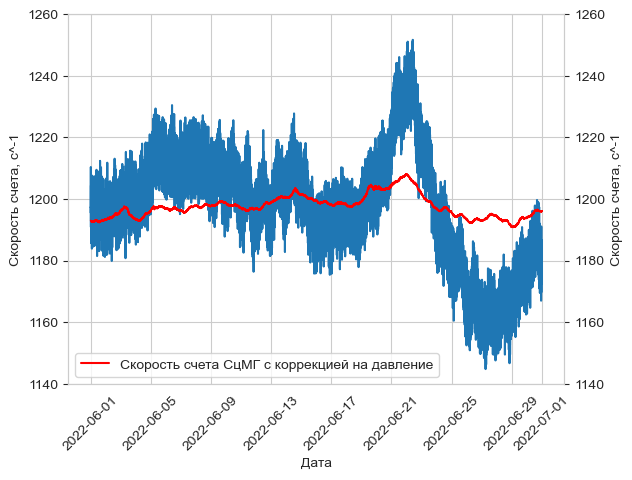

In [14]:
sns.set_style("whitegrid")

g1 = sns.lineplot(x = 'Date', y= 'I', data = counting_rate_ScMH)
g1.set(xlabel='Дата', ylabel='Скорость счета, с^-1')
g1.set(ylim=(1140, 1260)) #пределы значений оси y
plt.xticks(rotation=45)

ax2 = plt.twinx()

g2 = sns.lineplot(x ='Date', y = 'Icorrp', data = counting_rate_ScMH, \
                  label = 'Скорость счета СцМГ с коррекцией на давление', color='red', ax=ax2)
g2.set(ylim=(1140, 1260))
g2.grid(False)
g2.set(xlabel='Дата', ylabel='Скорость счета, с^-1')

plt.legend(loc = 'lower left')

plt.show()